### Import Necessary Libraries

In [139]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import scipy

 ### **Problem Statement: Crop Compatibility Prediction Based on Soil and Climate Factors**

#### Conversion of Csv file to DataFrame

In [140]:
df = pd.read_csv("Downloads/Soil-Climate-data.csv")
df.head()

,Crop_Type,Soil_Type,Farm_Size_Acres,Irrigation_Available,Soil_pH,Soil_Nitrogen,Soil_Organic_Matter,Temperature,Rainfall,Humidity,Compatible
0,summer paddy,Red and Yellow soils,79.838232,0,5.178290,198.870486,1.458550,20.172143,1861.635725,57.924332,0
1,Kulthi,Alluvial soils,33.932796,1,4.862699,27.781680,2.530317,33.646919,1400.435779,53.261910,0
2,Arhar,Laterite soils,59.673206,1,7.691357,62.500094,4.656399,22.535805,574.308028,65.547263,0
3,Gram,Alluvial soils,50.000261,0,6.482151,134.655093,2.268048,25.672081,1900.397115,34.972994,0
4,summer paddy,Red and Yellow soils,94.628058,0,6.054078,69.894889,1.448071,14.366488,1568.615247,25.953544,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Crop_Type             10000 non-null  object 
 1   Soil_Type             10000 non-null  object 
 2   Farm_Size_Acres       10000 non-null  float64
 3   Irrigation_Available  10000 non-null  int64  
 4   Soil_pH               10000 non-null  float64
 5   Soil_Nitrogen         10000 non-null  float64
 6   Soil_Organic_Matter   10000 non-null  float64
 7   Temperature           10000 non-null  float64
 8   Rainfall              10000 non-null  float64
 9   Humidity              10000 non-null  float64
 10  Compatible            10000 non-null  int64  
dtypes: float64(7), int64(2), object(2)
memory usage: 859.5+ KB


#### Checking for missing values

In [4]:
df.isna().sum()

Crop_Type               0
Soil_Type               0
Farm_Size_Acres         0
Irrigation_Available    0
Soil_pH                 0
Soil_Nitrogen           0
Soil_Organic_Matter     0
Temperature             0
Rainfall                0
Humidity                0
Compatible              0
dtype: int64

#### Checking for duplicates

In [5]:
df[df.duplicated()]

,Crop_Type,Soil_Type,Farm_Size_Acres,Irrigation_Available,Soil_pH,Soil_Nitrogen,Soil_Organic_Matter,Temperature,Rainfall,Humidity,Compatible


In [6]:
df["Compatible"].value_counts()

Compatible
0    9292
1     708
Name: count, dtype: int64

#### Checking for Outliers using Box plots

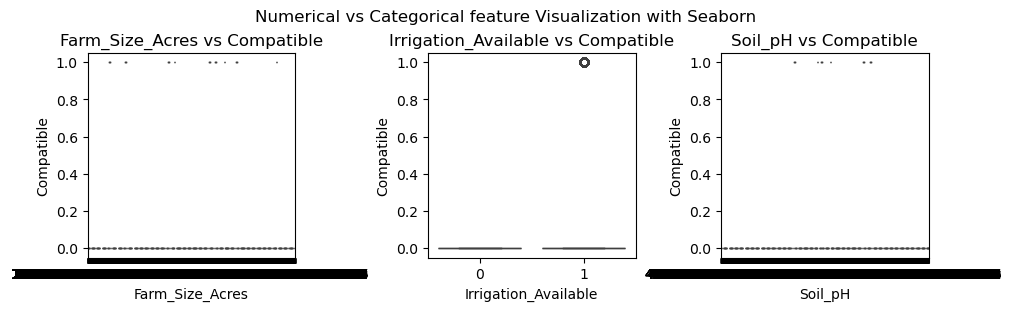

In [7]:
# Bivariate - Categorical vs Numerical Analysis
fig, axs = plt.subplots(1,3, figsize = (10,3), constrained_layout = True)
fig.suptitle("Numerical vs Categorical feature Visualization with Seaborn")

axs[0].set_title("Farm_Size_Acres vs Compatible")
sns.boxplot(data = df, x = "Farm_Size_Acres", y = "Compatible", ax = axs[0])

axs[1].set_title("Irrigation_Available vs Compatible")
sns.boxplot(data = df, x = "Irrigation_Available", y = "Compatible", ax = axs[1])

axs[2].set_title("Soil_pH vs Compatible")
sns.boxplot(data = df, x = "Soil_pH", y = "Compatible", ax = axs[2])

plt.show()

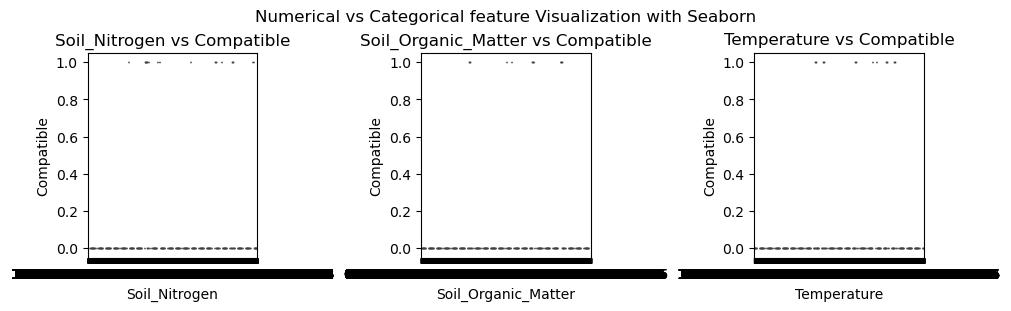

In [8]:
# Bivariate - Categorical vs Numerical Analysis
fig, axs = plt.subplots(1,3, figsize = (10,3), constrained_layout = True)
fig.suptitle("Numerical vs Categorical feature Visualization with Seaborn")

axs[0].set_title("Soil_Nitrogen vs Compatible")
sns.boxplot(data = df, x = "Soil_Nitrogen", y = "Compatible", ax = axs[0])

axs[1].set_title("Soil_Organic_Matter vs Compatible")
sns.boxplot(data = df, x = "Soil_Organic_Matter", y = "Compatible", ax = axs[1])

axs[2].set_title("Temperature vs Compatible")
sns.boxplot(data = df, x = "Temperature", y = "Compatible", ax = axs[2])

plt.show()

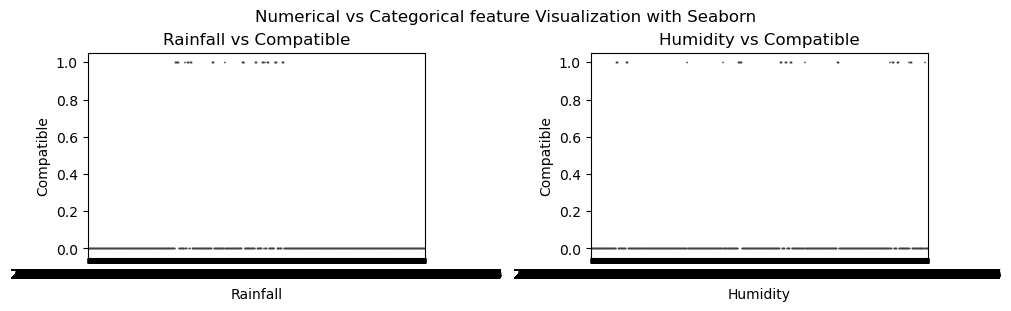

In [9]:
# Bivariate - Categorical vs Numerical Analysis
fig, axs = plt.subplots(1,2, figsize = (10,3), constrained_layout = True)
fig.suptitle("Numerical vs Categorical feature Visualization with Seaborn")

axs[0].set_title("Rainfall vs Compatible")
sns.boxplot(data = df, x = "Rainfall", y = "Compatible", ax = axs[0])

axs[1].set_title("Humidity vs Compatible")
sns.boxplot(data = df, x = "Humidity", y = "Compatible", ax = axs[1])

plt.show()

### Advance Feature Engineering Techniques

#### Correlation Map

In [14]:
df1 = df.drop(columns=["Crop_Type", "Soil_Type"])
df1.head()

,Farm_Size_Acres,Irrigation_Available,Soil_pH,Soil_Nitrogen,Soil_Organic_Matter,Temperature,Rainfall,Humidity,Compatible
0,79.838232,0,5.178290,198.870486,1.458550,20.172143,1861.635725,57.924332,0
1,33.932796,1,4.862699,27.781680,2.530317,33.646919,1400.435779,53.261910,0
2,59.673206,1,7.691357,62.500094,4.656399,22.535805,574.308028,65.547263,0
3,50.000261,0,6.482151,134.655093,2.268048,25.672081,1900.397115,34.972994,0
4,94.628058,0,6.054078,69.894889,1.448071,14.366488,1568.615247,25.953544,0


<Axes: >

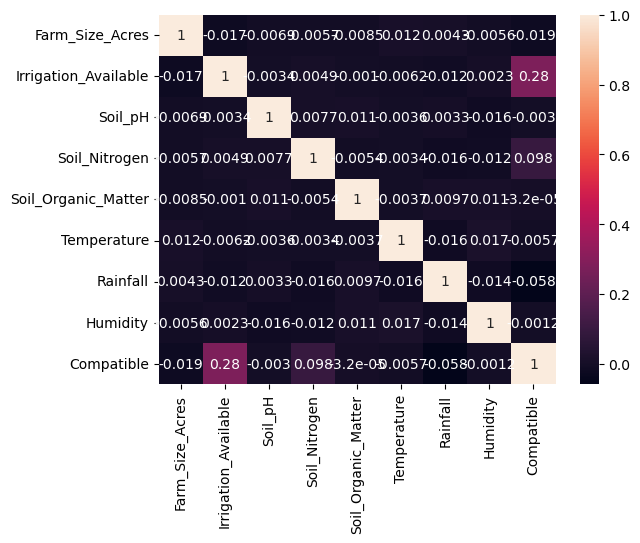

In [15]:
sns.heatmap(df1.corr(), annot= True)

#### Feature Selection Using Chi - Square Test:

In [18]:
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest
X = df1.drop("Compatible", axis = 1)
y = df1["Compatible"]
select_columns = SelectKBest(chi2, k = 5)
best_features = select_columns.fit_transform(X,y)

# To display best feature names
selected_features = X.columns[select_columns.get_support()]
print(selected_features)

Index(['Farm_Size_Acres', 'Irrigation_Available', 'Soil_Nitrogen',
       'Temperature', 'Rainfall'],
      dtype='object')


#### Mutual Information

In [17]:
# Mutual information for classification
from sklearn.feature_selection import mutual_info_classif
mutual_info = mutual_info_classif(X,y)
mutual_info =pd.Series(mutual_info)
mutual_info.index = X.columns
mutual_info.sort_values(ascending= False)

Irrigation_Available    0.054841
Soil_pH                 0.051318
Rainfall                0.044142
Temperature             0.027852
Soil_Nitrogen           0.016308
Farm_Size_Acres         0.000875
Soil_Organic_Matter     0.000000
Humidity                0.000000
dtype: float64

#### Variance Threshold

In [19]:
from sklearn.feature_selection import VarianceThreshold
var_thres = VarianceThreshold(threshold=0.1)
var_thres.fit_transform(X)
best_features = X.columns[var_thres.get_support()]
print(best_features)

Index(['Farm_Size_Acres', 'Irrigation_Available', 'Soil_pH', 'Soil_Nitrogen',
       'Soil_Organic_Matter', 'Temperature', 'Rainfall', 'Humidity'],
      dtype='object')


#### Recursive Feature Elimination

In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
lr = LogisticRegression()
rfe = RFE(lr, n_features_to_select= 5)
rfe.fit_transform(X,y)
selected_features = X.columns[rfe.get_support()]
print(selected_features)

C:\Users\INDIA\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Index(['Farm_Size_Acres', 'Irrigation_Available', 'Soil_pH', 'Soil_Nitrogen',
       'Temperature'],
      dtype='object')


#### Decision Tree Feature Importance

In [24]:
# Training the model and evaluation of learning
from sklearn.tree import DecisionTreeClassifier

classifier = DecisionTreeClassifier()
classifier.fit(X, y)

classifier.feature_importances_

array([0.        , 0.07739256, 0.21647698, 0.15193954, 0.        ,
       0.36276222, 0.19142871, 0.        ])

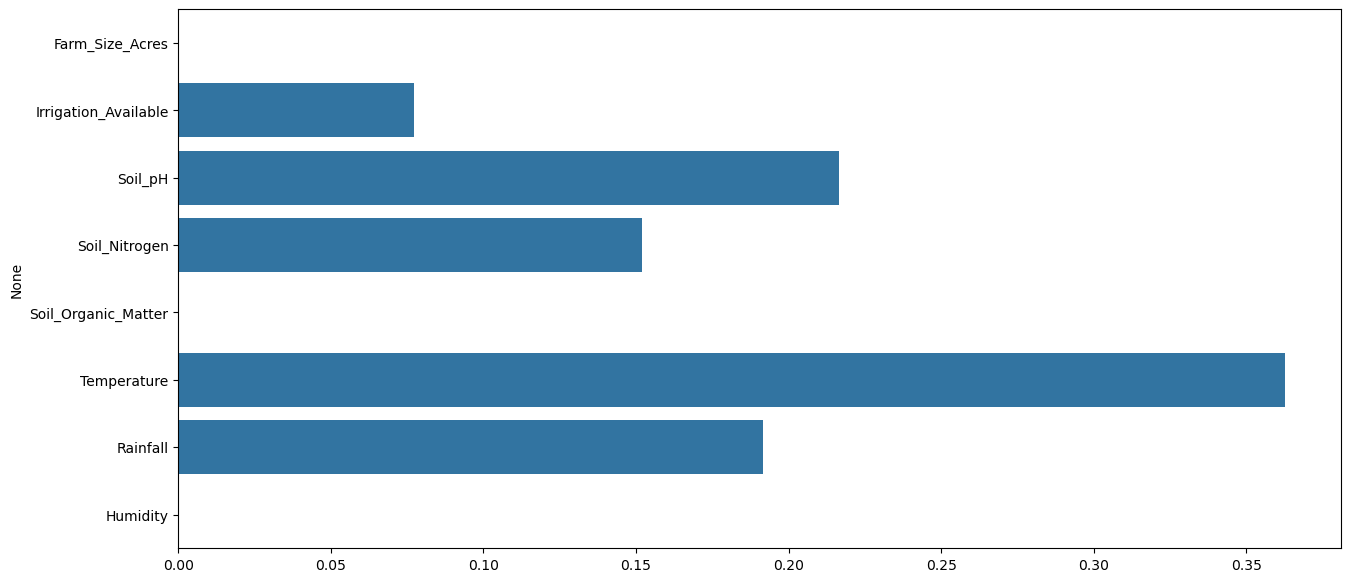

In [25]:
plt.figure(figsize=(15,7))

sns.barplot(x = classifier.feature_importances_, y = X.columns)

plt.show()

#### Assigning Input and Output Variables

In [141]:
X = df[["Crop_Type", "Soil_Type", "Irrigation_Available", "Soil_pH", "Soil_Nitrogen", "Temperature", "Rainfall"]]
y = df["Compatible"]
print(X.shape)
print(y.shape)

(10000, 7)
(10000,)


#### Splitting Train data and test data

In [142]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(8000, 7)
(2000, 7)
(8000,)
(2000,)


#### Data Preprocessing

In [143]:
from sklearn.preprocessing import OrdinalEncoder, StandardScaler

# Using Columntransfer
from sklearn.compose import ColumnTransformer
transformer = ColumnTransformer(transformers=[("t1", OrdinalEncoder(),[0,1]), ("t2", StandardScaler(), [2,3,4,5,6])])
X_train_trans = transformer.fit_transform(X_train)
X_test_trans = transformer.transform(X_test)
print(X_train_trans.shape)
print(X_test_trans.shape)

(8000, 7)
(2000, 7)


### Model Building and Validation

#### 1. KNN Algorithm

In [34]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

knn = KNeighborsClassifier()
knn.fit(X_train_trans, y_train)

y_pred = knn.predict(X_test_trans)

score = accuracy_score(y_pred, y_test)
print("Accuracy Score of KNN Model without Hyper parameters:", score)

Accuracy Score of KNN Model without Hyper parameters: 0.9415


#### 2. Naive Bayes Algorithm

In [35]:
from sklearn.naive_bayes import BernoulliNB

nb = BernoulliNB()
nb.fit(X_train_trans, y_train)

y_predict = nb.predict(X_test_trans)

print("Accuracy score of Naive Bayes Model:", accuracy_score(y_predict, y_test))

Accuracy score of Naive Bayes Model: 0.9225


#### 3. Decision Tree Algorithm

In [36]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(X_train_trans, y_train)

y_predicted = dt.predict(X_test_trans)

print("Accuracy score of Decision Tree Model Without Hyper parameters:", accuracy_score(y_predicted, y_test))

Accuracy score of Decision Tree Model Without Hyper parameters: 0.999


#### 4. Logistic Regression

In [37]:
from sklearn.linear_model import LogisticRegression

logr = LogisticRegression()
logr.fit(X_train_trans, y_train)

pred_y = logr.predict(X_test_trans)

print("Accuracy Score of Logistic Regression Model:", accuracy_score(pred_y, y_test))

Accuracy Score of Logistic Regression Model: 0.9225


#### 5. Random Forest Algorithm

In [38]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(X_train_trans, y_train)

predict_y = rf.predict(X_test_trans)

print("Accuracy Score of Random Forest Model:", accuracy_score(predict_y, y_test))

Accuracy Score of Random Forest Model: 0.998


#### 6. XG Boost Algorithm

In [39]:
import xgboost as xgb
from xgboost import XGBClassifier

xgb_model = XGBClassifier()
xgb_model.fit(X_train_trans, y_train)

predicted_y = xgb_model.predict(X_test_trans)

print("Accuracy Score of XG Boost Model:", accuracy_score(predicted_y, y_test))

Accuracy Score of XG Boost Model: 0.998


#### Hyper parameter tuning

In [128]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

train_scores, test_scores = list(), list()
values = [i for i in range(1,21)]
for i in values:
    model = KNeighborsClassifier(n_neighbors=i)
    model.fit(X_train_trans, y_train)

    y_train_pred = model.predict(X_train_trans)
    train_score = accuracy_score(y_train, y_train_pred)
    train_scores.append(train_score)

    y_test_pred = model.predict(X_test_trans)
    test_score = accuracy_score(y_test, y_test_pred)
    test_scores.append(test_score)

    print('> %d, train: %.3f, test: %.3f' % (i, train_score, test_score))

> 1, train: 1.000, test: 0.920
> 2, train: 0.968, test: 0.931
> 3, train: 0.974, test: 0.932
> 4, train: 0.963, test: 0.937
> 5, train: 0.969, test: 0.942
> 6, train: 0.961, test: 0.941
> 7, train: 0.966, test: 0.947
> 8, train: 0.960, test: 0.943
> 9, train: 0.964, test: 0.945
> 10, train: 0.955, test: 0.945
> 11, train: 0.960, test: 0.944
> 12, train: 0.955, test: 0.944
> 13, train: 0.958, test: 0.948
> 14, train: 0.953, test: 0.944
> 15, train: 0.956, test: 0.947
> 16, train: 0.952, test: 0.942
> 17, train: 0.956, test: 0.943
> 18, train: 0.952, test: 0.944
> 19, train: 0.954, test: 0.943
> 20, train: 0.950, test: 0.942


In [129]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import classification_report

#### Grid Search CV

In [131]:
tuned_parameters = [{'n_neighbors':[i for i in range(1,51)], 'p' : [1,2,3]}]

clf = GridSearchCV(
    estimator=KNeighborsClassifier(),
    param_grid=tuned_parameters,
    scoring='accuracy',
    cv=5,
    return_train_score=True,
    verbose=1 )
clf.fit(X_train_trans, y_train)

Fitting 5 folds for each of 150 candidates, totalling 750 fits


C:\Users\INDIA\anaconda3\Lib\site-packages\numpy\ma\core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid=[{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                          13, 14, 15, 16, 17, 18, 19, 20, 21,
                                          22, 23, 24, 25, 26, 27, 28, 29, 30, ...],
                          'p': [1, 2, 3]}],
             return_train_score=True, scoring='accuracy', verbose=1)

In [132]:
print("Best parameters set found on train set")
print(clf.best_params_)
print(clf.best_estimator_)
print()

print("Score on Test Data:", clf.score(X_test_trans, y_test))

Best parameters set found on train set
{'n_neighbors': 7, 'p': 1}
KNeighborsClassifier(n_neighbors=7, p=1)

Score on Test Data: 0.946


In [133]:
from sklearn.tree import DecisionTreeClassifier

tuned_parameters = [{'max_depth':[i for i in range(1,25)]}]

clf = GridSearchCV(
    estimator=DecisionTreeClassifier(),
    param_grid=tuned_parameters,
    scoring='accuracy',
    cv=5,
    return_train_score=True,
    verbose=1 )
clf.fit(X_train_trans, y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid=[{'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                        13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                        23, 24]}],
             return_train_score=True, scoring='accuracy', verbose=1)

#### RandomSearchCV

In [134]:
tuned_parameters = [{'n_neighbors':[i for i in range(1,51)], 'p' : [1,2,3]}]

clf = RandomizedSearchCV(
    estimator=KNeighborsClassifier(),
    param_distributions=tuned_parameters,
    scoring='accuracy',
    cv=5,
    return_train_score=True,
    verbose=1 )
clf.fit(X_train_trans, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=KNeighborsClassifier(),
                   param_distributions=[{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8,
                                                         9, 10, 11, 12, 13, 14,
                                                         15, 16, 17, 18, 19, 20,
                                                         21, 22, 23, 24, 25, 26,
                                                         27, 28, 29, 30, ...],
                                         'p': [1, 2, 3]}],
                   return_train_score=True, scoring='accuracy', verbose=1)

In [135]:
print("Best parameters set found on train set")
print(clf.best_params_)
print(clf.best_estimator_)
print()

print("Score on Test Data:", clf.score(X_test_trans, y_test))

Best parameters set found on train set
{'p': 3, 'n_neighbors': 23}
KNeighborsClassifier(n_neighbors=23, p=3)

Score on Test Data: 0.9425


In [136]:
tuned_parameters = [{'max_depth':[i for i in range(1,25)]}]

clf = RandomizedSearchCV(
    estimator=DecisionTreeClassifier(),
    param_distributions=tuned_parameters,
    scoring='accuracy',
    cv=5,
    return_train_score=True,
    verbose=1 )
clf.fit(X_train_trans, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(),
                   param_distributions=[{'max_depth': [1, 2, 3, 4, 5, 6, 7, 8,
                                                       9, 10, 11, 12, 13, 14,
                                                       15, 16, 17, 18, 19, 20,
                                                       21, 22, 23, 24]}],
                   return_train_score=True, scoring='accuracy', verbose=1)

In [137]:
print("Best parameters set found on train set")
print(clf.best_params_)
print(clf.best_estimator_)
print()

print("Score on Test Data:", clf.score(X_test_trans, y_test))

Best parameters set found on train set
{'max_depth': 13}
DecisionTreeClassifier(max_depth=13)

Score on Test Data: 0.999


### Unsupervised Machine Learning Models

#### 1. K-Means Clustering:

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Crop_Type             10000 non-null  object 
 1   Soil_Type             10000 non-null  object 
 2   Farm_Size_Acres       10000 non-null  float64
 3   Irrigation_Available  10000 non-null  int64  
 4   Soil_pH               10000 non-null  float64
 5   Soil_Nitrogen         10000 non-null  float64
 6   Soil_Organic_Matter   10000 non-null  float64
 7   Temperature           10000 non-null  float64
 8   Rainfall              10000 non-null  float64
 9   Humidity              10000 non-null  float64
 10  Compatible            10000 non-null  int64  
dtypes: float64(7), int64(2), object(2)
memory usage: 859.5+ KB


In [20]:
X = df.drop(columns= ["Crop_Type", "Soil_Type"])
print(X.shape)

(10000, 9)


In [21]:
from sklearn.cluster import KMeans
kms = KMeans(n_clusters=3, n_init=1)

kms.fit(X)

KMeans(n_clusters=3, n_init=1)

Text(0.5, 1.0, 'K Mean Clustering')

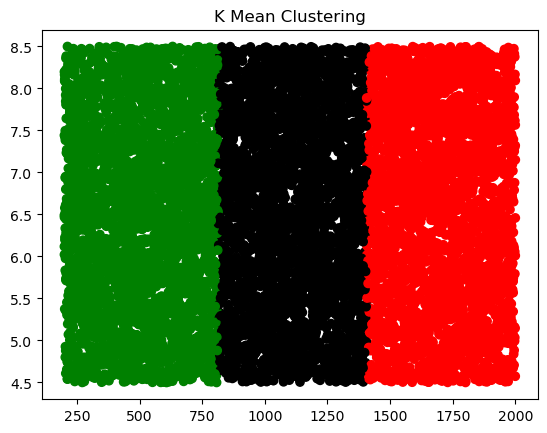

In [30]:
colormap = np.array(['red', 'green', 'black'])

# Plot the original classifications
plt.scatter(X.Rainfall, X.Soil_pH, c= colormap[kms.labels_])

plt.title('K Mean Clustering')

Text(0.5, 1.0, 'K Mean Clustering')

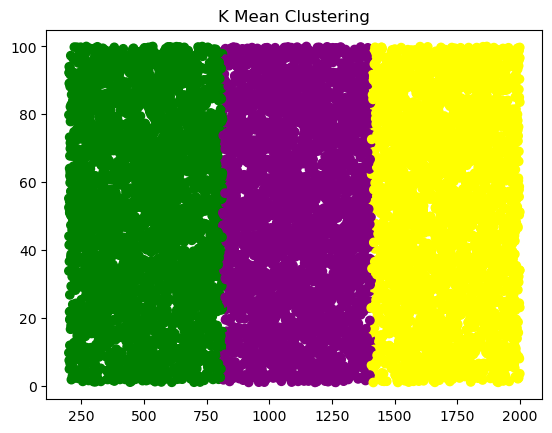

In [28]:
colormap = np.array(['yellow', 'green', 'purple'])

# Plot the original classifications
plt.scatter(X.Rainfall, X.Farm_Size_Acres, c= colormap[kms.labels_])

plt.title('K Mean Clustering')

In [31]:
# Calculating Silhoutte Score

from sklearn.metrics import silhouette_score
print(silhouette_score(X, kms.labels_))

0.5447416636087554


#### 2. Hierarchial Clustering

In [32]:
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

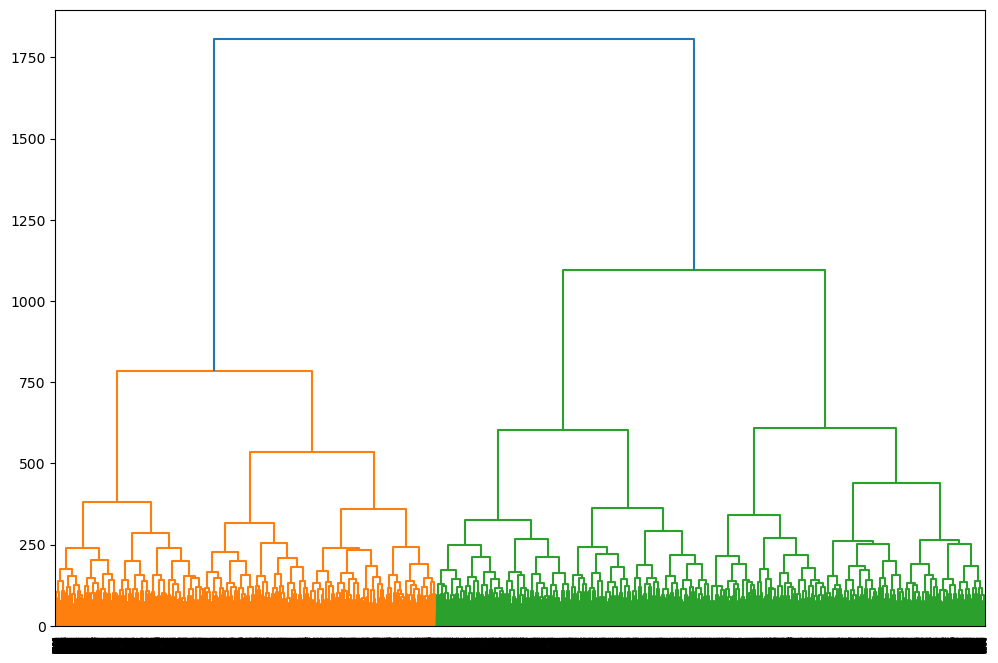

In [33]:
# Complete Linkage

plt.figure(figsize=(12,8))
mergings = linkage(X, method="complete", metric="euclidean")
dendrogram(mergings)
plt.show()

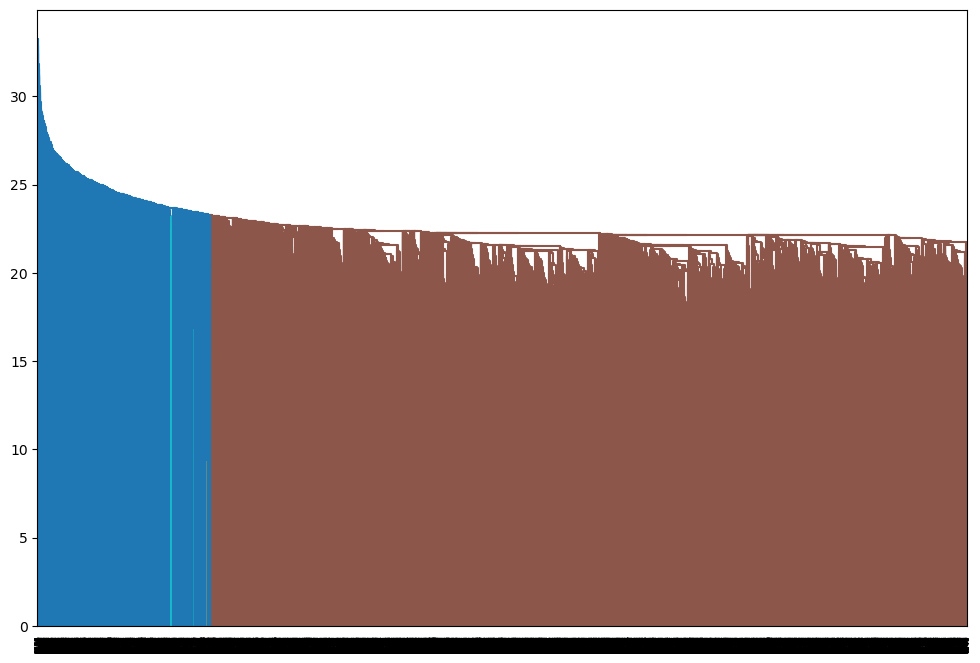

In [34]:
# Single Linkage

plt.figure(figsize=(12,8))
mergings = linkage(X, method="single", metric="euclidean")
dendrogram(mergings)
plt.show()

#### 3. DB Scan

In [35]:
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_blobs
from sklearn.neighbors import NearestNeighbors

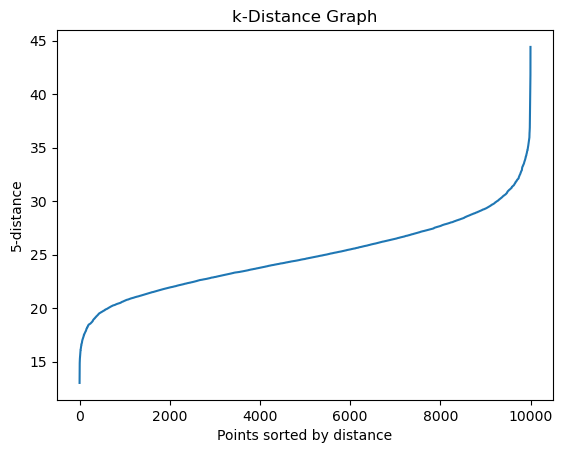

In [36]:
# Compute distances to the k-th nearest neighbor (k = min_samples - 1)

k = 5 # min_samples - 1
neighbors = NearestNeighbors(n_neighbors=k)
neighbors_fit = neighbors.fit(X)
distances, _ = neighbors_fit.kneighbors(X)

# Sort distances to find the elbow point
distances = np.sort(distances[:, -1])
plt.plot(distances)
plt.title("k-Distance Graph")
plt.xlabel("Points sorted by distance")
plt.ylabel(f"{k}-distance")
plt.show()

In [37]:
# Based on the k-distance graph, choose an appropriate value for eps.
eps = 0.5 # Adjust this based on the graph
min_samples = 5 # Minimum number of points to form a cluster

# Fit DBSCAN model
dbscan = DBSCAN(eps=eps, min_samples= min_samples)
labels = dbscan.fit_predict(X)

In [73]:
xy

,Farm_Size_Acres,Irrigation_Available,Soil_pH,Soil_Nitrogen,Soil_Organic_Matter,Temperature,Rainfall,Humidity,Compatible
0,79.838232,0,5.178290,198.870486,1.458550,20.172143,1861.635725,57.924332,0
1,33.932796,1,4.862699,27.781680,2.530317,33.646919,1400.435779,53.261910,0
2,59.673206,1,7.691357,62.500094,4.656399,22.535805,574.308028,65.547263,0
3,50.000261,0,6.482151,134.655093,2.268048,25.672081,1900.397115,34.972994,0
4,94.628058,0,6.054078,69.894889,1.448071,14.366488,1568.615247,25.953544,0
...,...,...,...,...,...,...,...,...,...
9995,73.497132,0,7.138860,95.197615,1.680658,33.601341,709.701039,57.115040,0
9996,77.833334,1,6.413179,161.589195,1.600210,35.770149,924.681359,67.307039,0
9997,7.650368,0,8.346277,185.800148,1.834768,15.244196,1784.341177,76.699897,0
9998,21.290809,1,6.928760,110.942542,3.383431,20.225473,1745.550446,64.897215,0


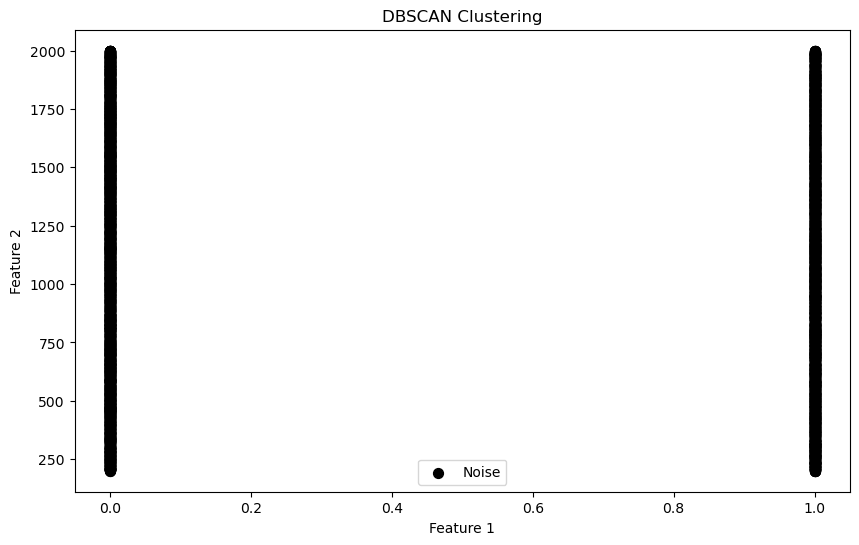

In [89]:
import numpy as np
import matplotlib.pyplot as plt

# Extract the unique cluster labels (including noise, labeled as -1)
unique_labels = set(labels)

# Create a color map for visualization
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]

plt.figure(figsize=(10, 6))

for label, color in zip(unique_labels, colors):
    if label == -1:
        # Noise points are plotted in black
        color = [0, 0, 0, 1]  # RGBA for black

    class_member_mask = (labels == label)
    xy = X[class_member_mask]
    
    plt.scatter(xy.iloc[:, 1], xy.iloc[:,6], s=50, color=[color], label=f"Cluster {label}" if label != -1 else "Noise")

plt.title("DBSCAN Clustering")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()


In [94]:
# Print number of clusters and noise points
n_clusters = len(unique_labels) - (-1 in labels) # Exclude noise from cluster count
n_noise = list(labels).count(-1)

print(f"Number of clusters: {n_clusters}")
print(f"Number of noise points: {n_noise}")

Number of clusters: 0
Number of noise points: 10000


#### PCA

In [95]:
X.columns

Index(['Farm_Size_Acres', 'Irrigation_Available', 'Soil_pH', 'Soil_Nitrogen',
       'Soil_Organic_Matter', 'Temperature', 'Rainfall', 'Humidity',
       'Compatible'],
      dtype='object')

In [96]:
# Data - Preprocessing : Standardizing the data
from sklearn.preprocessing import StandardScaler
standardized_data = StandardScaler().fit_transform(X)
print(standardized_data.shape)

(10000, 9)


In [97]:
# Initializing PCA 
from sklearn.decomposition import PCA
pca = PCA()

In [98]:
pca.fit(standardized_data)

PCA()

In [99]:
pca.components_

array([[-8.70696111e-02,  6.45736370e-01, -7.75151300e-03,
         2.42741443e-01, -9.33232761e-03, -2.30938209e-02,
        -1.69537369e-01,  8.53977408e-04,  6.97922534e-01],
       [ 1.67885239e-01, -1.23851016e-02, -4.12104928e-01,
        -1.49334324e-01, -1.26736192e-01,  5.38770204e-01,
        -4.06183699e-01,  5.55155341e-01, -3.44949641e-03],
       [-4.09157579e-01,  1.65277268e-01, -8.23157117e-03,
        -4.16643100e-01,  6.14132814e-01, -1.22536726e-01,
         2.26240977e-01,  4.33883179e-01, -5.59908626e-04],
       [-3.17692516e-01, -2.51282887e-01,  5.55213926e-01,
         4.26063797e-01,  2.81326003e-01,  2.59381713e-01,
        -4.29868130e-01,  1.14949710e-01, -4.13796537e-02],
       [ 6.53157165e-01,  1.54875129e-01,  3.73605796e-01,
        -1.39310849e-01,  3.74922620e-01,  4.22189017e-01,
         2.36869059e-01, -1.04615773e-01,  6.74437583e-02],
       [ 3.25273329e-01, -1.81635832e-01, -4.48606141e-01,
         5.71888600e-01,  4.88448536e-01, -2.767527

In [100]:
pca.explained_variance_ratio_

array([0.1453572 , 0.11534476, 0.11343367, 0.11215858, 0.11068531,
       0.10937777, 0.1081097 , 0.10737033, 0.07816268])

In [101]:
np.cumsum(pca.explained_variance_ratio_)

array([0.1453572 , 0.26070196, 0.37413563, 0.48629421, 0.59697952,
       0.70635729, 0.81446699, 0.92183732, 1.        ])

In [103]:
np.arange(len(pca.explained_variance_ratio_))

array([0, 1, 2, 3, 4, 5, 6, 7, 8])

In [104]:
# configuring the parameters
# number of components = 2
pca_new = PCA(n_components=2)
pca_new_data = pca_new.fit_transform(standardized_data)

# shape of the data
print("Shape = ", pca_new_data.shape)

Shape =  (10000, 2)


In [110]:
pca_df = pd.DataFrame(data = pca_new_data, columns=("1st_principal", "2nd_principal"))

pca_df["Label"] = df['Compatible']

pca_df.head()

,1st_principal,2nd_principal,Label
0,-0.721811,-0.297198,0
1,0.065878,0.955790,0
2,0.407573,0.085544,0
3,-0.956719,-1.158849,0
4,-1.229959,-1.178893,0


In [111]:
# configuring the parameters
# number of components = 1
new_pca = PCA(n_components=1)
new_data_pca = new_pca.fit_transform(standardized_data)

# shape of the data
print("Shape = ", new_data_pca.shape)

Shape =  (10000, 1)


In [112]:
df_pca = pd.DataFrame(data = new_data_pca)

df_pca["label"] = df['Compatible']

df_pca.head()

,0,label
0,-0.721811,0
1,0.065878,0
2,0.407573,0
3,-0.956719,0
4,-1.229959,0


#### t-Distributed Stochastic Neighbor Embedding

In [113]:
import numpy as np
import pandas as pd
from sklearn.manifold import TSNE
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
import seaborn as sns

In [122]:
# Initialize t-SNE with 2 components ( for 2D visualization)
tsne = TSNE(n_components=2, random_state=42, perplexity=30, learning_rate=200)

# Fit and transform the data
X_embedded = tsne.fit_transform(X)

In [123]:
# Convert the results to a DataFrame for easier plotting
tsne_df = pd.DataFrame(X_embedded, columns= ['Component 1', 'Component 2'])
tsne_df['target'] = y

In [124]:
tsne_df.head()

,Component 1,Component 2,target
0,96.297050,13.918312,0
1,39.149170,-23.193316,0
2,-45.420307,16.658426,0
3,90.888901,-3.508253,0
4,32.140965,12.941555,0
